In [3]:
import numpy
from pathlib import Path
from PIL import Image

In [4]:
path = Path('/home/aja/pyladies2/pyworking-barvy/pictures/les.jpeg')
path

PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/les.jpeg')

In [5]:
path.exists()

True

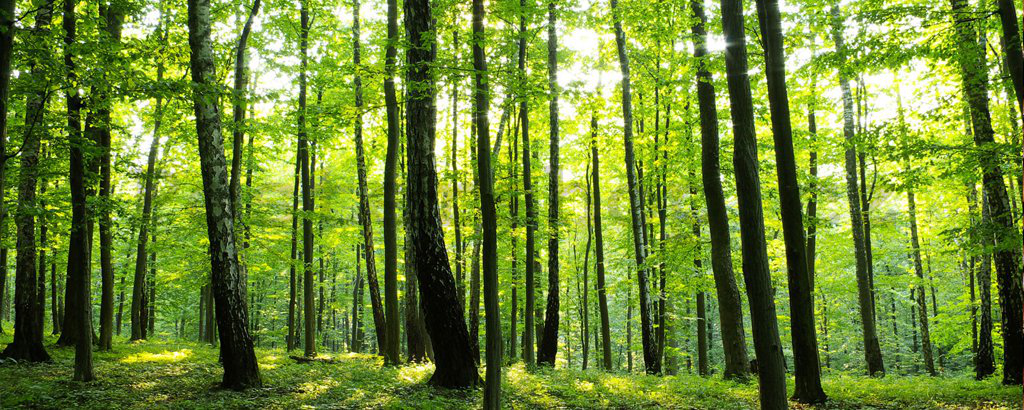

In [7]:
image = Image.open(path).convert('RGB')
image

In [9]:
arr = numpy.array(image) / 255 #prevedeni na array + usnadneni prace s 0-1
arr

array([[[0.02745098, 0.07058824, 0.00392157],
        [0.03137255, 0.08235294, 0.01176471],
        [0.03921569, 0.09019608, 0.01960784],
        ...,
        [0.4627451 , 0.64705882, 0.20784314],
        [0.49411765, 0.50588235, 0.14901961],
        [0.51764706, 0.35686275, 0.04705882]],

       [[0.02745098, 0.07058824, 0.00784314],
        [0.03529412, 0.07843137, 0.01568627],
        [0.03921569, 0.09019608, 0.02352941],
        ...,
        [0.40784314, 0.61568627, 0.05882353],
        [0.39215686, 0.41960784, 0.01568627],
        [0.5372549 , 0.38039216, 0.09803922]],

       [[0.03137255, 0.07058824, 0.02745098],
        [0.03529412, 0.0745098 , 0.03137255],
        [0.04705882, 0.08627451, 0.04313725],
        ...,
        [0.47058824, 0.70980392, 0.00784314],
        [0.49803922, 0.54901961, 0.09411765],
        [0.56078431, 0.40784314, 0.15294118]],

       ...,

       [[0.29803922, 0.38039216, 0.22745098],
        [0.21176471, 0.29803922, 0.14509804],
        [0.1254902 , 0

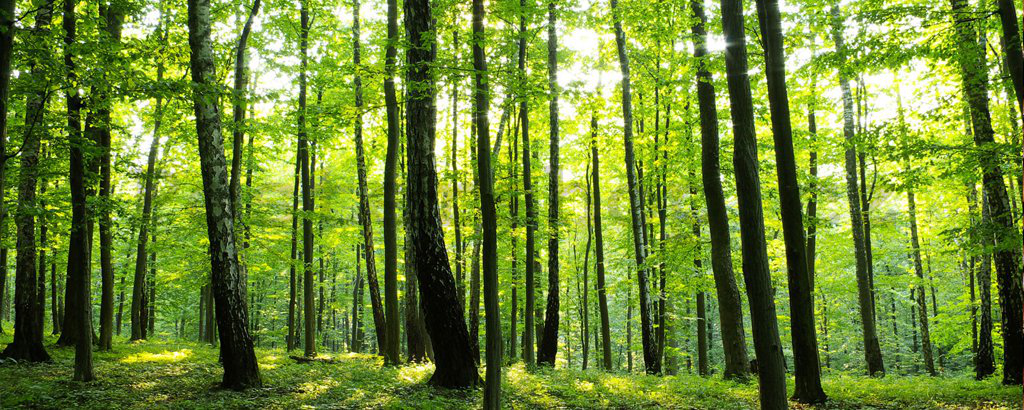

In [11]:
def imshow(arr):
    return Image.fromarray(numpy.uint8(arr * 255)) #prevedeni z matice na obrazek 

imshow(arr)

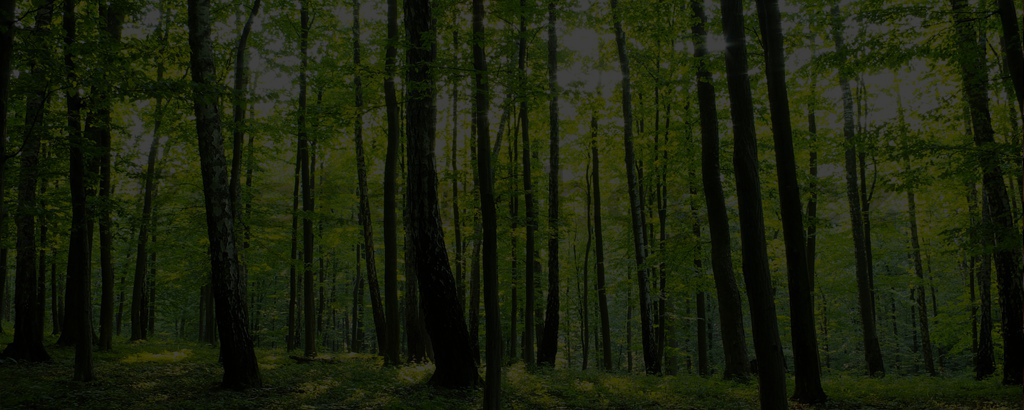

In [18]:
imshow(arr/4) #zmaveni

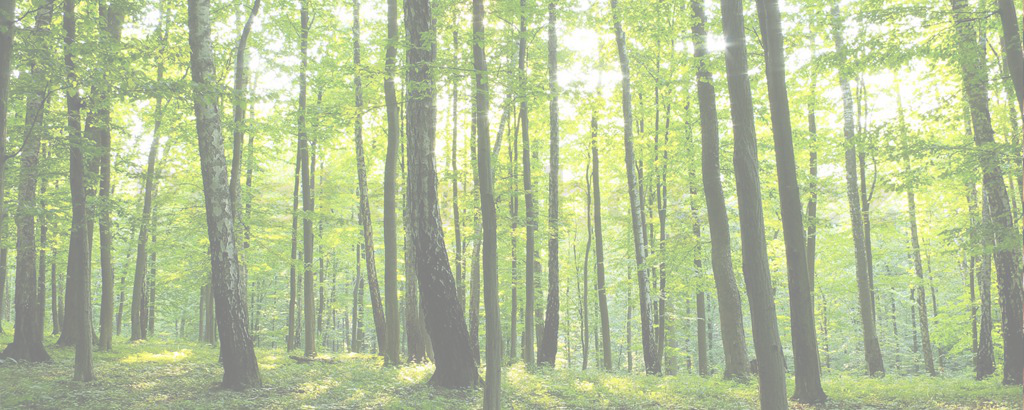

In [22]:
imshow(1-(1-arr)/2) # zesvetleni

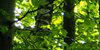

In [28]:
imshow(arr[:50, :100]) #vezme prvni 50 radku/50 sloupcu z obrazku

In [29]:
list(range(20))[::2] # =odkud|kam|pokolikati = od zacatku, do konce, po 2

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

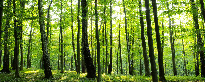

In [32]:
imshow(arr[::5, ::5])

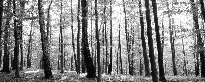

In [36]:
imshow(arr[::5, ::5, 1]) #3 pole vybre cervenou[0], zelenou[1], modrou[2]

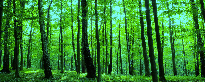

In [37]:
imshow(arr[::5, ::5] / [2, 1, 1]) #podeli barvy (=propusti min barvy), tento je mondry "filter"

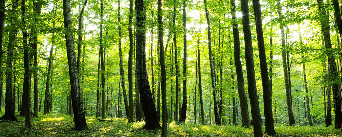

In [40]:
small = arr[::3, ::3].copy()
imshow(small)

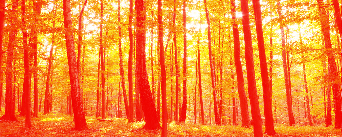

In [44]:
small[:, :, 0] = 1 - (1 - small[:, :, 0]) / 2 #prepisuje cerveny kanal
imshow(small)

In [47]:
import colorsys
h, s, v = colorsys.rgb_to_hsv(0, 1, 0) #ODSTIN\BARVA\SVETLOST
h, s, v

(0.3333333333333333, 1.0, 1)

In [48]:
r, g, b, = colorsys.hsv_to_rgb(h, s, v)
r, g, b

(0.0, 1, 0.0)

In [51]:
from mix_demo import RGBCircle

In [52]:
def show_hsv(h, s, v):
    r, g, b, = colorsys.hsv_to_rgb(h, s, v)
    return RGBCircle(r*255, g*255, b*255)

In [95]:
show_hsv(0.2, 1, 1)

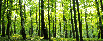

In [65]:
imshow(arr[::10, ::10])

In [68]:
arr.shape[0]

410

In [70]:
thumb = arr[::arr.shape[0]//10, ::arr.shape[1]//10] #zmenseni na 10x10 pix

In [71]:
imshow(thumb)

In [72]:
thumb

array([[[0.02745098, 0.07058824, 0.00392157],
        [0.17254902, 0.34509804, 0.09803922],
        [0.32941176, 0.4       , 0.29803922],
        [0.52156863, 0.69803922, 0.23921569],
        [0.09019608, 0.09803922, 0.14509804],
        [0.36078431, 0.56078431, 0.16470588],
        [0.28235294, 0.36078431, 0.07843137],
        [0.63137255, 0.77647059, 0.16078431],
        [0.54117647, 0.69803922, 0.17647059],
        [0.85098039, 1.        , 0.        ],
        [0.51764706, 0.71764706, 0.18039216]],

       [[0.02745098, 0.05098039, 0.04313725],
        [0.15686275, 0.29803922, 0.15686275],
        [0.34117647, 0.42745098, 0.27843137],
        [0.22745098, 0.34901961, 0.08235294],
        [0.40784314, 0.57254902, 0.14901961],
        [0.26666667, 0.40784314, 0.05490196],
        [0.93333333, 1.        , 0.25490196],
        [0.96078431, 0.96862745, 0.9254902 ],
        [0.96470588, 1.        , 0.89411765],
        [0.92941176, 0.94117647, 0.7254902 ],
        [0.21568627, 0.30980392,

In [107]:
import math



def average_hue(path):
    image = Image.open(path).convert('RGB')
    arr = numpy.array(image) / 255
    thumb = arr[::arr.shape[0]//10, ::arr.shape[1]//10]

    x_sum = 0
    y_sum = 0

    for row in thumb:
        for pixel in row:
            r, g, b = pixel
            h, s, v = colorsys.rgb_to_hsv(r, g, b)
            weight = s * v
            y = math.sin(h * 2 * math.pi) * weight
            x = math.cos(h * 2 * math.pi) * weight
            x_sum = x_sum + x
            y_sum = y_sum + y
    num_pixels = thumb.shape[0] * thumb.shape[1]
    average_x = x_sum / num_pixels
    average_y = y_sum / num_pixels
    return math.atan2(average_y, average_x) / (2 * math.pi)

In [111]:
show_hsv(average_hue(path), 1 , 1)

In [116]:
show_hsv(average_hue('/home/aja/pyladies2/pyworking-barvy/pictures/ruze_red.jpg'), 1 , 1)

In [113]:
show_hsv(average_hue('/home/aja/pyladies2/pyworking-barvy/pictures/pap_zluta.jpeg'), 1 , 1)

In [114]:
show_hsv(average_hue('/home/aja/pyladies2/pyworking-barvy/pictures/more.jpg'), 1 , 1)

In [110]:
show_hsv(average_hue('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180513_091619.jpg'), 1 , 1)

In [115]:
show_hsv(average_hue('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20160206_161603.jpg'), 1 , 1)

In [117]:
base = Path('/home/aja/pyladies2/pyworking-barvy/pictures/')
base

PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures')

In [130]:
pictures = list(base.glob('**/*.jpg')) + list(base.glob('**/*.jpeg')) 
pictures 

[PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180412_105923.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/more.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180226_174153.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180513_091619.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/les_green.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180410_095817.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180214_202102.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180608_183513.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/ruze_red.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180407_171108.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180507_213325.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/pap_zluta.jpeg'),
 PosixPath('/home/aja/pyladies2/pywor

In [131]:
hues = {}
for path in pictures:
    hues[path] = average_hue(path)
    
print(hues)

{PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180412_105923.jpg'): 0.09462838122194853, PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/more.jpg'): -0.40091169566684504, PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180226_174153.jpg'): 0.07005466961281921, PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180513_091619.jpg'): 0.08567442627438386, PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/les_green.jpg'): 0.2663575371750066, PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180410_095817.jpg'): 0.04512107097087807, PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180214_202102.jpg'): 0.05720424587873882, PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180608_183513.jpg'): 0.049171687368470156, PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/ruze_red.jpg'): -0.05028873253655773, PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180407_171108.jpg'): 0.204681365030

In [136]:
sorted(pictures, key=hues.get)

[PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/more.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/ruze_red.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180507_213325.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180410_095817.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180608_183513.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180214_202102.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180226_174153.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180513_091619.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180412_105923.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/pap_zluta.jpeg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180407_171108.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/les.jpeg'),
 PosixPath('/home/aja/pyladies2/pyworking-

In [137]:
def key(path):
    return hues[path]
#stejny kod pro stejny vysledek jak nahore, ale je zbytecny, kdyz v pythonu uz je..

In [146]:
ordered = sorted(pictures, key=key)
ordered

[PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/more.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/ruze_red.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180507_213325.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180410_095817.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180608_183513.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180214_202102.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180226_174153.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180513_091619.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180412_105923.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/pap_zluta.jpeg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180407_171108.jpg'),
 PosixPath('/home/aja/pyladies2/pyworking-barvy/pictures/les.jpeg'),
 PosixPath('/home/aja/pyladies2/pyworking-

In [147]:
results = []
for path in ordered:
    results.append("<img src='{url}' height='150'>".format(url=path.as_uri()))

html = '\n'.join(results)
print(html)

<img src='file:///home/aja/pyladies2/pyworking-barvy/pictures/more.jpg' height='150'>
<img src='file:///home/aja/pyladies2/pyworking-barvy/pictures/ruze_red.jpg' height='150'>
<img src='file:///home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180507_213325.jpg' height='150'>
<img src='file:///home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180410_095817.jpg' height='150'>
<img src='file:///home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180608_183513.jpg' height='150'>
<img src='file:///home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180214_202102.jpg' height='150'>
<img src='file:///home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180226_174153.jpg' height='150'>
<img src='file:///home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180513_091619.jpg' height='150'>
<img src='file:///home/aja/pyladies2/pyworking-barvy/pictures/IMG_20180412_105923.jpg' height='150'>
<img src='file:///home/aja/pyladies2/pyworking-barvy/pictures/pap_zluta.jpeg' height='150'>
<img src='file:///home/aj

In [140]:
path.as_uri()

'file:///home/aja/pyladies2/pyworking-barvy/pictures/les.jpeg'

In [149]:
output_path = Path('vysledek.html')
output_path

PosixPath('vysledek.html')

In [150]:
output_path.write_text(html)

1252

In [152]:
uri = output_path.resolve().as_uri()

In [153]:
import webbrowser
webbrowser.open(uri)

True

In [159]:
base = Path('/home/aja/pyladies2/pyworking-barvy/pictures/')
pictures = list(base.glob('**/*.jpg')) + list(base.glob('**/*.jpeg')) 

In [160]:
def process(pictures, output_path):
    hues = {}
    for path in pictures:
        hues[path] = average_hue(path)
    ordered = sorted(pictures, key=hues.get)
    results = []
    for path in ordered:
        results.append("<img src='{url}' height='150'>".format(url=path.as_uri()))
    html = '\n'.join(results)
    output_path.write_text(html)
    uri = output_path.resolve().as_uri()
    webbrowser.open(uri)

In [161]:
process(pictures, Path('vysledek2.html'))